## Compute the intercept and gradient from angle gathers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import avo_func as avo
import L1_L2_norm as l1l2
%matplotlib inline

### Elastic properties for AVO classes
The cell below defines the elastic properties for AVO classes compiled by [Alessandro del Monte](http://nbviewer.ipython.org/github/aadm/geophysical_notes/blob/master/avo_explorer_v2_mono.ipynb). Originally, Class IV is from Castagna & Swan (1997) "Principles of AVO crossplotting" (1997) and the others from Hilterman (2001) "Seismic Amplitude Interpretation".

In [2]:
shale = np.array([[3094,1515,2.40], [2643,1167,2.29], [2192,818,2.16], [3240,1620,2.34]])
sandgas = np.array([[4050,2526,2.21], [2781,1665,2.08], [1542,901,1.88], [1650,1090,2.07]])
avocl=['Class I','Class II','Class III','Class IV']

angle = np.arange(0,41,1)

### 3 layers: shale / sand gas / shale

In [3]:
#approximations at the top from class I to IV
It1,Gt1,shueyt1,_ = avo.shuey(shale[0,0],shale[0,1],shale[0,2],sandgas[0,0],sandgas[0,1],sandgas[0,2],angle)
It2,Gt2,shueyt2,_ = avo.shuey(shale[1,0],shale[1,1],shale[1,2],sandgas[1,0],sandgas[1,1],sandgas[1,2],angle)
It3,Gt3,shueyt3,_ = avo.shuey(shale[2,0],shale[2,1],shale[2,2],sandgas[2,0],sandgas[2,1],sandgas[2,2],angle)
It4,Gt4,shueyt4,_ = avo.shuey(shale[3,0],shale[3,1],shale[3,2],sandgas[3,0],sandgas[3,1],sandgas[3,2],angle)


#approximations at the base from class I to IV
Ib1,Gb1,shueyb1,_ = avo.shuey(sandgas[0,0],sandgas[0,1],sandgas[0,2],shale[0,0],shale[0,1],shale[0,2],angle)
Ib2,Gb2,shueyb2,_ = avo.shuey(sandgas[1,0],sandgas[1,1],sandgas[1,2],shale[1,0],shale[1,1],shale[1,2],angle)
Ib3,Gb3,shueyb3,_ = avo.shuey(sandgas[2,0],sandgas[2,1],sandgas[2,2],shale[2,0],shale[2,1],shale[2,2],angle)
Ib4,Gb4,shueyb4,_ = avo.shuey(sandgas[3,0],sandgas[3,1],sandgas[3,2],shale[3,0],shale[3,1],shale[3,2],angle)

###  Plot the reflectivity x angle and the crossplot

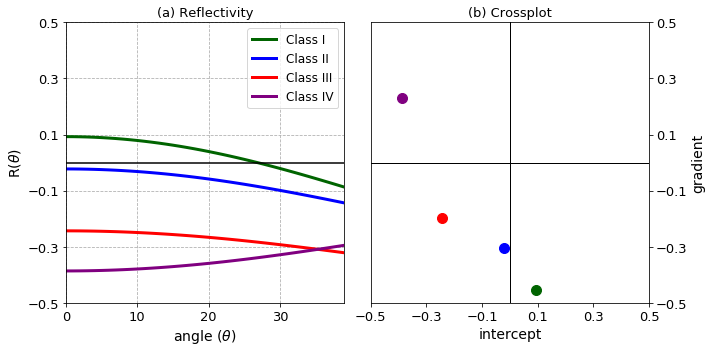

In [4]:
mxplot=0.5

fig=plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
plt.title('(a) Reflectivity',fontsize=13)
plt.plot(angle,shueyt1,'-',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,shueyt2,'-',color='blue',label='Class II',linewidth=3)
plt.plot(angle,shueyt3,'-',color='red',label='Class III',linewidth=3)
plt.plot(angle,shueyt4,'-',color='purple',label='Class IV',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('R($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle-1))
plt.ylim(-mxplot,mxplot)
plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,2,2)
plt.title('(b) Crossplot',fontsize=13)
ax.plot(It1,Gt1,'o',color='darkgreen',markersize=10)
ax.plot(It2,Gt2,'o',color='blue',markersize=10)
ax.plot(It3,Gt3,'o',color='red',markersize=10)
ax.plot(It4,Gt4,'o',color='purple',markersize=10)

ax.axhline(0, color='k', lw=1), ax.axvline(0, color='k', lw=1)
ax.set_xlabel('intercept', fontsize=14), ax.set_ylabel('gradient', fontsize=14)
ax.set_xlim(-mxplot,mxplot), ax.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax.set_yticks(yt)
ax.set_xticks(xt)
ax.xaxis.set_label_position('bottom'), ax.xaxis.tick_bottom()
ax.yaxis.set_label_position('right'), ax.yaxis.tick_right()
ax.tick_params(labelsize=13)

plt.tight_layout()

#### Now I'll compute and plot the reflectivity, wavelet, normal incidence offset gather and angle gather. 

In [5]:
vp=np.zeros((300,4));vs=np.zeros((300,4));rho=np.zeros((300,4));NI=np.zeros((300,4))
anglegather=np.zeros((4,300,len(angle)))
for i in range(len(shale)):
    # the properties now will generate a log
    vp1 = np.zeros(100) + shale[i,0] #m/s
    vs1 = np.zeros(100) + shale[i,1]
    rho1 = np.zeros(100) + shale[i,2] #g/cc
    vp2 = np.zeros(100) + sandgas[i,0]
    vs2 = np.zeros(100) + sandgas[i,1] #m/s
    rho2 = np.zeros(100) + sandgas[i,2] #g/cc

    vp[:,i]=np.concatenate((vp1,vp2,vp1))
    vs[:,i]=np.concatenate((vs1,vs2,vs1))
    rho[:,i]=np.concatenate((rho1,rho2,rho1))

    ip=vp[:,i]*rho[:,i] #impedance
    rc=avo.reflect_coef(ip) #reflection coefficient - normal incidence
    #define the ricker wavelet
    freq=25
    length = 0.150
    dt = 0.001
    time,wavelet=avo.rickerwave(freq, length, dt)
    #normal incidence offset gather
    NI[:,i]=np.convolve(wavelet,rc,mode='same')
    #reflectivity on a interface
    reflect,r0,g=avo.shueyrc(vp[:,i],vs[:,i],rho[:,i],angle)
    #generate the angle gather
    gather=[]
    for j in range(len(angle)):
        gather.append(np.convolve(wavelet,reflect[:,j],mode='same'))
    anglegather[i]=np.asarray(gather).T

time2=np.arange(0,(len(ip))*dt,dt)

#### Plot the angle gathers

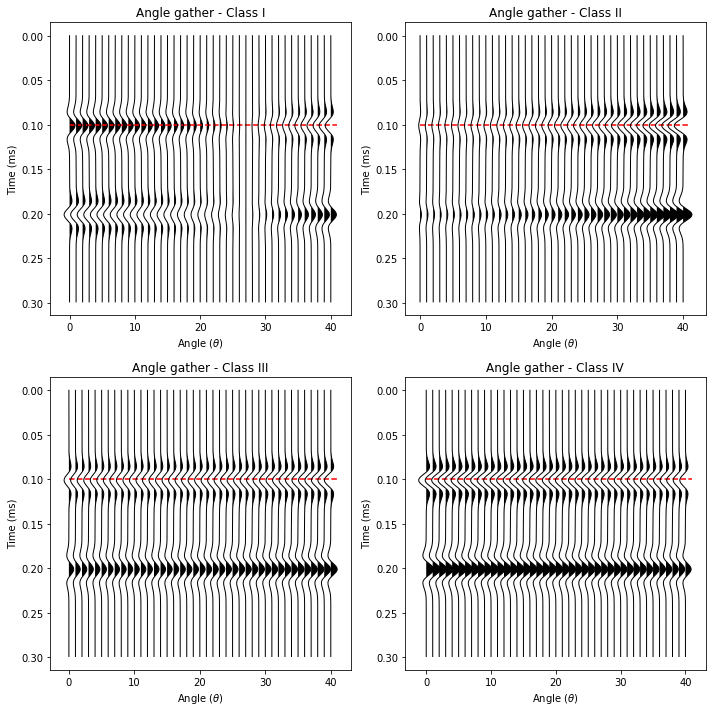

In [6]:
scale_factor=3. #this is scalable according to the plot
anglegatherplt=anglegather*scale_factor #just for the plot
anglegatherplt[0]=anglegatherplt[0]*scale_factor # Twice just for the plot
anglegatherplt[1]=anglegatherplt[1]*scale_factor #Twice just for the plot
fig=plt.figure(figsize=(10,10))
for j in range(len(avocl)):
    ax = plt.subplot(2,2,j+1)
    plt.title('Angle gather - '+avocl[j])
    for i in range(len(angle)):
           ax.plot(i+anglegatherplt[j,:,i],time2,'k',linewidth=1)
           ax.fill_betweenx(time2,anglegatherplt[j,:,i]+i,i,
                            where=anglegatherplt[j,:,i]+i>i,facecolor='black')
    ax.invert_yaxis()
    ax.set_xlabel('Angle ($\\theta$)')
    ax.set_ylabel('Time (ms)')
    plt.hlines(0.1,0,41,colors = 'r',linestyles = 'dashed')
    plt.tight_layout()

#### Fit a first order polynomial to the noise free data along the red line

In [7]:
angle2=np.sin(np.radians(angle))**2

In [8]:
A=np.vstack((angle2**0,angle2**1)).T

In [9]:
y=[]
pest_l2=np.zeros((len(anglegather),2))
predict_l2=np.zeros((len(anglegather),len(angle)))
res_l2=np.zeros((len(anglegather),len(angle)))

pest_l1=np.zeros((len(anglegather),2))
predict_l1=np.zeros((len(anglegather),len(angle)))
res_l1=np.zeros((len(anglegather),len(angle)))

for i in range(len(anglegather)):
    # L2-norm
    pest_l2[i,:],predict_l2[i,:],res_l2[i,:]=l1l2.l2_norm(A,anglegather[i,101,:])
    # L1-norm
    pest_l1[i], predict_l1[i], res_l1[i] = l1l2.l1_norm(A,anglegather[i,101,:])


#### Plot the input and the predicted data using L1 and L2 regularization

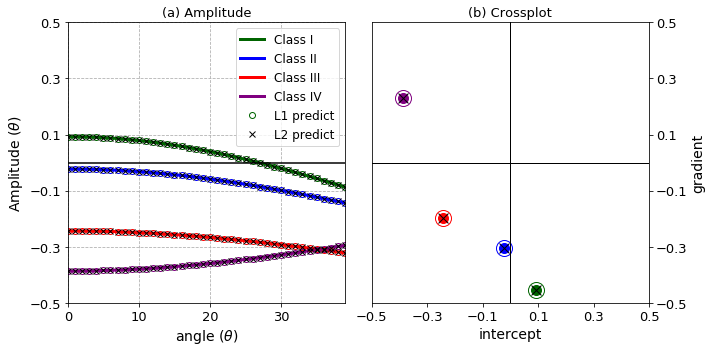

In [10]:
mxplot=0.5

fig=plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
plt.title('(a) Amplitude',fontsize=13)
plt.plot(angle,anglegather[0,101,:],'-',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,anglegather[1,101,:],'-',color='blue',label='Class II',linewidth=3)
plt.plot(angle,anglegather[2,101,:],'-',color='red',label='Class III',linewidth=3)
plt.plot(angle,anglegather[3,101,:],'-',color='purple',label='Class IV',linewidth=3)

plt.plot(angle,predict_l1[0],'o',mfc='none',color='darkgreen',label='L1 predict',linewidth=8)
plt.plot(angle,predict_l1[1],'o',mfc='none',color='blue',linewidth=8)
plt.plot(angle,predict_l1[2],'o',mfc='none',color='red',linewidth=8)
plt.plot(angle,predict_l1[3],'o',mfc='none',color='purple',linewidth=8)

plt.plot(angle,predict_l2[0],'x',color='black',label='L2 predict',linewidth=3)
plt.plot(angle,predict_l2[1],'x',color='black',linewidth=3)
plt.plot(angle,predict_l2[2],'x',color='black',linewidth=3)
plt.plot(angle,predict_l2[3],'x',color='black',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('Amplitude ($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle-1))
plt.ylim(-mxplot,mxplot)
plt.legend(fontsize='large')
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,2,2)
plt.title('(b) Crossplot',fontsize=13)
ax.plot(It1,Gt1,'o',color='darkgreen',markersize=10)
ax.plot(It2,Gt2,'o',color='blue',markersize=10)
ax.plot(It3,Gt3,'o',color='red',markersize=10)
ax.plot(It4,Gt4,'o',color='purple',markersize=10)

ax.plot(pest_l1[0][0],pest_l1[0][1],'o',mfc='none',color='darkgreen',markersize=16)
ax.plot(pest_l1[1][0],pest_l1[1][1],'o',mfc='none',color='blue',markersize=16)
ax.plot(pest_l1[2][0],pest_l1[2][1],'o',mfc='none',color='red',markersize=16)
ax.plot(pest_l1[3][0],pest_l1[3][1],'o',mfc='none',color='purple',markersize=16)

ax.plot(pest_l2[0][0],pest_l2[0][1],'x',color='black',markersize=10)
ax.plot(pest_l2[1][0],pest_l2[1][1],'x',color='black',markersize=10)
ax.plot(pest_l2[2][0],pest_l2[2][1],'x',color='black',markersize=10)
ax.plot(pest_l2[3][0],pest_l2[3][1],'x',color='black',markersize=10)

ax.axhline(0, color='k', lw=1), ax.axvline(0, color='k', lw=1)
ax.set_xlabel('intercept', fontsize=14), ax.set_ylabel('gradient', fontsize=14)
ax.set_xlim(-mxplot,mxplot), ax.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax.set_yticks(yt)
ax.set_xticks(xt)
ax.xaxis.set_label_position('bottom'), ax.xaxis.tick_bottom()
ax.yaxis.set_label_position('right'), ax.yaxis.tick_right()
ax.tick_params(labelsize=13)

plt.tight_layout()

Above, in the perfect world, everything works fine without noise, the predicted data from both regularizations fit the input data

#### Generate and add random gaussian noise

In [11]:
mu=0
anglegather_noise=np.zeros_like(anglegather)
for i in range(len(anglegather)):
    sigma=0.005*(i+1) #distinct weights
    noise=np.random.normal(mu, sigma, anglegather[i].shape)
    anglegather_noise[i]=anglegather[i]+noise

#### Plot the noisy angle gathers

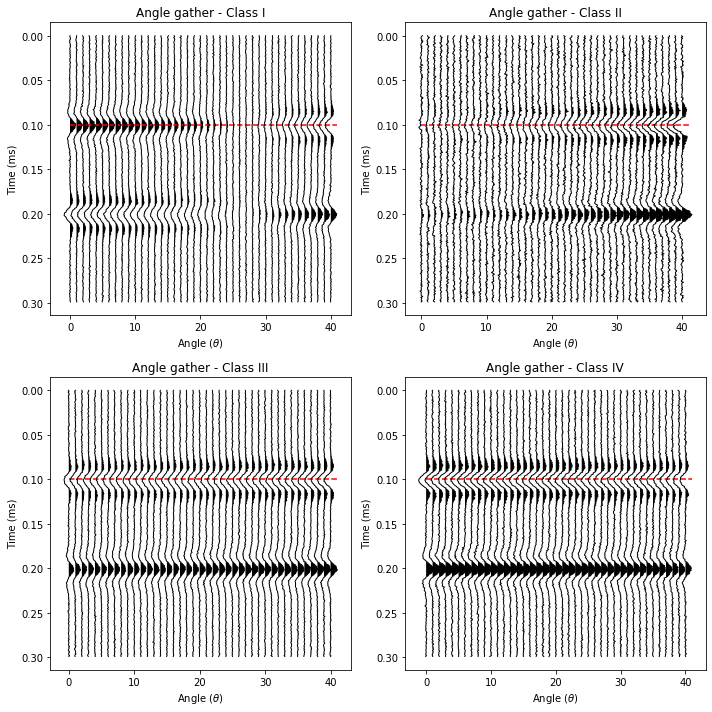

In [12]:
scale_factor=3. #this is scalable according to the plot
anglegatherplt=anglegather_noise*scale_factor #just for the plot
anglegatherplt[0]=anglegatherplt[0]*scale_factor # Twice just for the plot
anglegatherplt[1]=anglegatherplt[1]*scale_factor #Twice just for the plot
fig=plt.figure(figsize=(10,10))
for j in range(len(avocl)):
    ax = plt.subplot(2,2,j+1)
    plt.title('Angle gather - '+avocl[j])
    for i in range(len(angle)):
           ax.plot(i+anglegatherplt[j,:,i],time2,'k',linewidth=1)
           ax.fill_betweenx(time2,anglegatherplt[j,:,i]+i,i,
                            where=anglegatherplt[j,:,i]+i>i,facecolor='black')
    ax.invert_yaxis()
    ax.set_xlabel('Angle ($\\theta$)')
    ax.set_ylabel('Time (ms)')
    plt.hlines(0.1,0,41,colors = 'r',linestyles = 'dashed')
    plt.tight_layout()

#### Fit a first order polynomial to the noisy data

In [13]:
angle2=np.sin(np.radians(angle))**2

In [14]:
A=np.vstack((angle2**0,angle2**1)).T

In [15]:
y=[]
pest_l2=np.zeros((len(anglegather),2))
predict_l2=np.zeros((len(anglegather),len(angle)))
res_l2=np.zeros((len(anglegather),len(angle)))

pest_l1=np.zeros((len(anglegather),2))
predict_l1=np.zeros((len(anglegather),len(angle)))
res_l1=np.zeros((len(anglegather),len(angle)))

for i in range(len(anglegather)):
    # L2-norm
    pest_l2[i,:],predict_l2[i,:],res_l2[i,:]=l1l2.l2_norm(A,anglegather_noise[i,101,:])
    # L1-norm
    pest_l1[i], predict_l1[i], res_l1[i] = l1l2.l1_norm(A,anglegather_noise[i,101,:])


#### Plot the input, noisy and the predicted data using L1 and L2 regularization

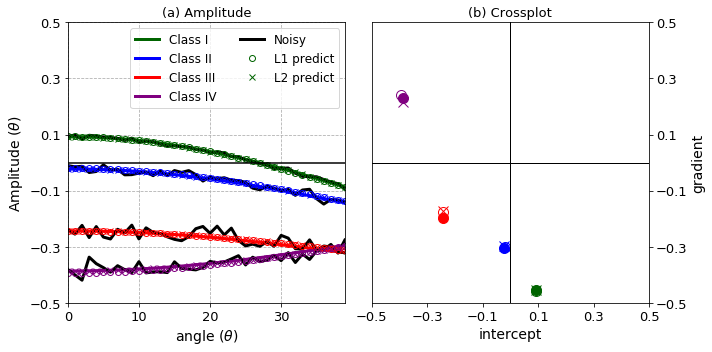

In [16]:
mxplot=0.5

fig=plt.figure(figsize=(10,5))

ax=plt.subplot(1,2,1)
plt.title('(a) Amplitude',fontsize=13)
plt.plot(angle,anglegather[0,101,:],'-',color='darkgreen',label='Class I',linewidth=3)
plt.plot(angle,anglegather[1,101,:],'-',color='blue',label='Class II',linewidth=3)
plt.plot(angle,anglegather[2,101,:],'-',color='red',label='Class III',linewidth=3)
plt.plot(angle,anglegather[3,101,:],'-',color='purple',label='Class IV',linewidth=3)

plt.plot(angle,anglegather_noise[0,101,:],'-',color='black',label='Noisy',linewidth=3)
plt.plot(angle,anglegather_noise[1,101,:],'-',color='black',linewidth=3)
plt.plot(angle,anglegather_noise[2,101,:],'-',color='black',linewidth=3)
plt.plot(angle,anglegather_noise[3,101,:],'-',color='black',linewidth=3)

plt.plot(angle,predict_l1[0],'o',mfc='none',color='darkgreen',label='L1 predict',linewidth=3)
plt.plot(angle,predict_l1[1],'o',mfc='none',color='blue',linewidth=3)
plt.plot(angle,predict_l1[2],'o',mfc='none',color='red',linewidth=3)
plt.plot(angle,predict_l1[3],'o',mfc='none',color='purple',linewidth=3)

plt.plot(angle,predict_l2[0],'x',color='darkgreen',label='L2 predict',linewidth=3)
plt.plot(angle,predict_l2[1],'x',color='blue',linewidth=3)
plt.plot(angle,predict_l2[2],'x',color='red',linewidth=3)
plt.plot(angle,predict_l2[3],'x',color='purple',linewidth=3)

plt.axhline(0, color='k')
ax.set_xlabel('angle ($\\theta$)', fontsize=14)
ax.set_ylabel('Amplitude ($\\theta$)', fontsize=14)
yt=np.linspace(-mxplot,mxplot,6)
plt.yticks(yt)
plt.xlim(0.,np.max(angle-1))
plt.ylim(-mxplot,mxplot)
plt.legend(fontsize='large',ncol=2)
ax.tick_params(labelsize=13)
plt.grid(linestyle='--')

ax=plt.subplot(1,2,2)
plt.title('(b) Crossplot',fontsize=13)
ax.plot(It1,Gt1,'o',color='darkgreen',markersize=10)
ax.plot(It2,Gt2,'o',color='blue',markersize=10)
ax.plot(It3,Gt3,'o',color='red',markersize=10)
ax.plot(It4,Gt4,'o',color='purple',markersize=10)

ax.plot(pest_l1[0][0],pest_l1[0][1],'o',mfc='none',color='darkgreen',markersize=10)
ax.plot(pest_l1[1][0],pest_l1[1][1],'o',mfc='none',color='blue',markersize=10)
ax.plot(pest_l1[2][0],pest_l1[2][1],'o',mfc='none',color='red',markersize=10)
ax.plot(pest_l1[3][0],pest_l1[3][1],'o',mfc='none',color='purple',markersize=10)

ax.plot(pest_l2[0][0],pest_l2[0][1],'x',color='darkgreen',markersize=10)
ax.plot(pest_l2[1][0],pest_l2[1][1],'x',color='blue',markersize=10)
ax.plot(pest_l2[2][0],pest_l2[2][1],'x',color='red',markersize=10)
ax.plot(pest_l2[3][0],pest_l2[3][1],'x',color='purple',markersize=10)

ax.axhline(0, color='k', lw=1), ax.axvline(0, color='k', lw=1)
ax.set_xlabel('intercept', fontsize=14), ax.set_ylabel('gradient', fontsize=14)
ax.set_xlim(-mxplot,mxplot), ax.set_ylim(-mxplot,mxplot)
yt=np.linspace(-mxplot,mxplot,6)
xt=np.linspace(-mxplot,mxplot,6)
ax.set_yticks(yt)
ax.set_xticks(xt)
ax.xaxis.set_label_position('bottom'), ax.xaxis.tick_bottom()
ax.yaxis.set_label_position('right'), ax.yaxis.tick_right()
ax.tick_params(labelsize=13)

plt.tight_layout()

### References:

Castagna, J. P., and H. W. Swan, 1997, Principles of AVO crossplotting: The Leading Edge, 16, no. 4, 337–342, http://dx.doi.org/10.1190/1.1437626.

Hilterman, F. J., 2001. Seismic amplitude interpretation: 2001 distinguished instructor short course (No. 4). SEG Books.

Shuey,R.T., 1985, A simplification of Zoeppritz equations: Geophysics, 50, 609–614.
 
https://github.com/aadm/avo_explorer